In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('../preprocess_data.csv')
df.drop(['task_1','text'], axis=1, inplace=True)
df.head()

,_id,task_2,task_3,task_4,text_clean
0,Gujarati_image_1618.jpg,Positive,Vulgar,Abusive,છોકર). ટીચર તમાર તાજમહેલ\r\n\r\nદેખ/ય છે.\r\n\...
1,Gujarati_image_31.jpg,Positive,Vulgar,Abusive,છોકરો : ના.\r\n છોકરી : કેમ?\r\n \r\n છોકરી : ...
2,Gujarati_image_1144.jpg,Negative,Vulgar,Abusive,"છોકરીઓ ગમે તેટલી\r\n ચાલક હોય,\r\n \r\n પણ છોક..."
3,Gujarati_image_1184.jpg,Negative,Vulgar,Abusive,"દોસ્તી કરો,પ્રેમ કરો, વફા કરો...\r\n અને બહુ મ..."
4,Gujarati_image_1643.jpg,Neutral,Vulgar,Abusive,"છોકરીઓ ગમે તેટલી\r\nચાલક હોય,\r\n\r\nપણ છોકરા ..."


Text(0, 0.5, 'Frequency')

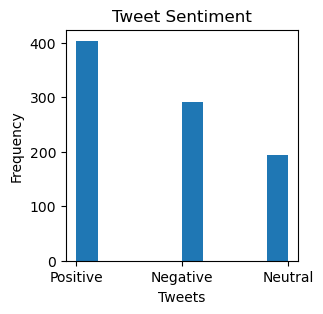

In [3]:
fig, ax = plt.subplots(figsize=(3,3))

ax.hist(df['task_2'])

ax.set_title('Tweet Sentiment')
ax.set_xlabel('Tweets')
ax.set_ylabel('Frequency')

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5)
X = tfidfconverter.fit_transform(df['text_clean'].values.astype('U')).toarray()
y = df['task_2']

In [5]:
import pickle
# 保存模型和特征转换器
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidfconverter, f)
    
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)

In [6]:
print("y:",y[:10])

y: [2 2 0 0 1 0 1 0 2 2]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[16 19  8]
 [ 2 19  2]
 [11 42 15]]
              precision    recall  f1-score   support

           0       0.55      0.37      0.44        43
           1       0.24      0.83      0.37        23
           2       0.60      0.22      0.32        68

    accuracy                           0.37       134
   macro avg       0.46      0.47      0.38       134
weighted avg       0.52      0.37      0.37       134



In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[11  2 30]
 [ 7  3 13]
 [15  3 50]]
              precision    recall  f1-score   support

           0       0.33      0.26      0.29        43
           1       0.38      0.13      0.19        23
           2       0.54      0.74      0.62        68

    accuracy                           0.48       134
   macro avg       0.42      0.37      0.37       134
weighted avg       0.44      0.48      0.44       134



In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[30  0 13]
 [13  2  8]
 [47  2 19]]
              precision    recall  f1-score   support

           0       0.33      0.70      0.45        43
           1       0.50      0.09      0.15        23
           2       0.47      0.28      0.35        68

    accuracy                           0.38       134
   macro avg       0.44      0.35      0.32       134
weighted avg       0.43      0.38      0.35       134



In [11]:
dt3 = classifier

In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[11  2 30]
 [ 8  2 13]
 [17  2 49]]
              precision    recall  f1-score   support

           0       0.31      0.26      0.28        43
           1       0.33      0.09      0.14        23
           2       0.53      0.72      0.61        68

    accuracy                           0.46       134
   macro avg       0.39      0.35      0.34       134
weighted avg       0.43      0.46      0.42       134



In [13]:
dt1 = classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 48)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[14  5 24]
 [ 8  4 11]
 [30  7 31]]
              precision    recall  f1-score   support

           0       0.27      0.33      0.29        43
           1       0.25      0.17      0.21        23
           2       0.47      0.46      0.46        68

    accuracy                           0.37       134
   macro avg       0.33      0.32      0.32       134
weighted avg       0.37      0.37      0.36       134



In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[15  4 24]
 [ 6  1 16]
 [15  5 48]]
              precision    recall  f1-score   support

           0       0.42      0.35      0.38        43
           1       0.10      0.04      0.06        23
           2       0.55      0.71      0.62        68

    accuracy                           0.48       134
   macro avg       0.35      0.37      0.35       134
weighted avg       0.43      0.48      0.44       134



In [16]:
from sklearn.model_selection import RepeatedKFold

In [17]:
from sklearn.svm import LinearSVC
sv = LinearSVC()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      sv.fit(x_train,y_train)
      predictions = sv.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score



C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

0.34831460674157305
0.4606741573033708
0.48314606741573035
0.5056179775280899


C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

0.5168539325842697


C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

In [18]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.28      0.24      0.26        29
           1       0.25      0.16      0.19        19
           2       0.45      0.57      0.51        40

    accuracy                           0.38        88
   macro avg       0.33      0.32      0.32        88
weighted avg       0.35      0.38      0.36        88



In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      rf.fit(x_train,y_train)
      predictions = rf.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score

0.43820224719101125
0.5056179775280899
0.550561797752809
0.5617977528089888


In [20]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.32      0.34      0.33        29
           1       0.11      0.08      0.09        13
           2       0.50      0.52      0.51        46

    accuracy                           0.40        88
   macro avg       0.31      0.31      0.31        88
weighted avg       0.38      0.40      0.39        88



In [21]:
dt2 = rf

In [22]:
import pickle

# 假设 dt1, dt2, dt3 是你已经训练好的模型
pickle.dump(dt1, open('finalized_svc_model1.sav', 'wb'))
pickle.dump(dt2, open('finalized_rfc_model1.sav', 'wb'))
pickle.dump(dt3, open('finalized_knc_model1.sav', 'wb'))
